# Lab 07

In [1]:
from __future__ import print_function, division

In [2]:
from skimage import data, io
import numpy as np
from matplotlib import pyplot as plt
import time

## Part 1

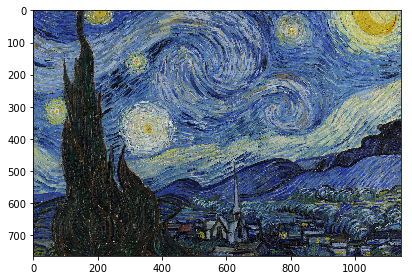

(764L, 1145L, 3L)


In [3]:
# Load image here. Display the image and the image shape.
img = io.imread('starry.jpg')
io.imshow(img)
plt.show()
print(img.shape)

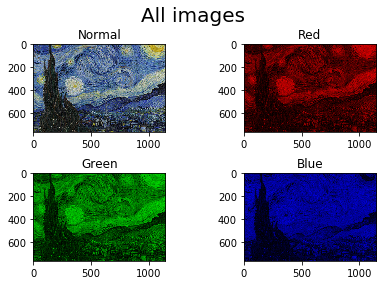

In [4]:
# Make the color arrays and display them on a labelled subplot.
red = np.copy(img)
red[:, :, 1] = 0    
red[:, :, 2] = 0 
green = np.copy(img)
green[:, :, 0] = 0    
green[:, :, 2] = 0
blue = np.copy(img)
blue[:, :, 1] = 0    
blue[:, :, 0] = 0
f, ((ax0, ax1),(ax2, ax3)) = plt.subplots(2,2)
ax0.set_title('Normal')
ax0.imshow(img)
ax1.set_title('Red')
ax1.imshow(red)
ax2.set_title('Green')
ax2.imshow(green)
ax3.set_title('Blue')
ax3.imshow(blue)
plt.tight_layout()
plt.suptitle('All images', fontsize=20)
plt.subplots_adjust(top=0.85)
plt.show()


## Part 2

In [31]:
from math import sqrt
from skimage.feature import blob_log, blob_doh
from skimage.color import rgb2gray

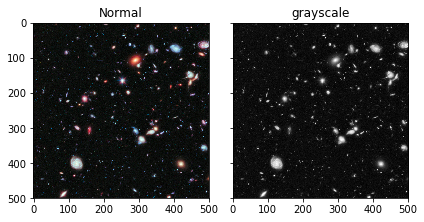

In [32]:
# Here is the image of the Hubble Deep Field. 
image = data.hubble_deep_field()[0:500, 0:500]

#Convert the image to grayscale and display next to the original.
grayscale = rgb2gray(image)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(image)
ax1.set_title('Normal')
ax2.imshow(grayscale, cmap=plt.get_cmap('gray'))
ax2.set_title('grayscale')
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [63]:
# Apply the two Blob detection methods and measure the time taken by the algorithms.
start_time = time.clock()
log = blob_log(grayscale, threshold=0.2)
print (time.clock() - start_time, "secondsfor log")
start_time = time.clock()
doh = blob_doh(grayscale, threshold=0.01)
print (time.clock() - start_time, "seconds for doh")


1.84482513005 secondsfor log
0.534019808628 seconds for doh


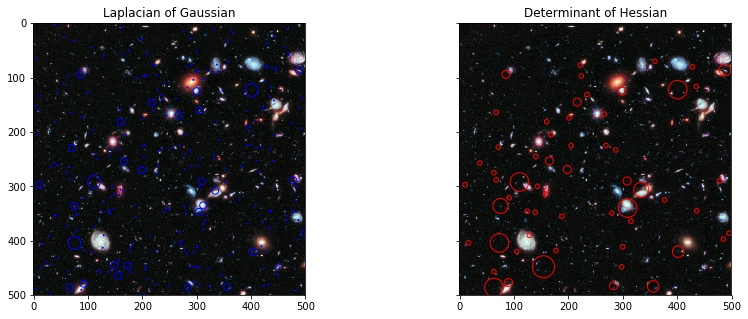

In [64]:
# Plot the 2 methods side-by-side along with circle patches.
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 5))
ax1.imshow(image)
ax1.set_title('Laplacian of Gaussian')
for thing in log:
    patch = plt.Circle((thing[0], thing[1]), thing[2], color='b', fill=False)
    ax1.add_patch(patch)
ax2.imshow(image)
ax2.set_title('Determinant of Hessian')
for thing in doh:
    patch = plt.Circle((thing[0], thing[1]), thing[2], color='r', fill=False)
    ax2.add_patch(patch)
plt.show()